In [4]:
import sympy
import math
import numpy as np
import matplotlib.pyplot as plt
import pylab
## 3d imports >
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Ray Tracing

##### Abstract:
Explore basic concepts of ray tracing algorith and implement a functional ray tracer. Explore different use cases and implementation of ray tracing.
##### Introduction:

##### Deliverables:
- Technical report
- Tutorial
- Scientific article
- Popular science article
- Multimedia product / explainer
- Code repo / library / framework / app

### 1.0 Geenral Notes
- Used to render images with computers.
- In the real world our eyes capture all of the rays in order to see. However, in computer graphics we don't have infinite computanional power, so we use only the rays that reach or hit our eyes directly or after rebounds.

"Given a set of 3D objects, shoot a ray from the eye through the
center of every pixel and see what it hits"


#### 1.1  Ray casting:

- Render a scene by shooting one ray per pixel.
- Ability to deal with non-planar surfaces and solids.

#### 1.2  Ray tracing:
Ray tracing is an improvement on ray casting.

- Introduces reflection, refraction and shadows.
- Reflections continue on in the mirror-reflection direction of shiny or reflective surfaces.
- Refraction is the ray which direction is into the object and can also exit it.
- Shadow is computed by creating shadow rays which originates from the intersection to all lights.

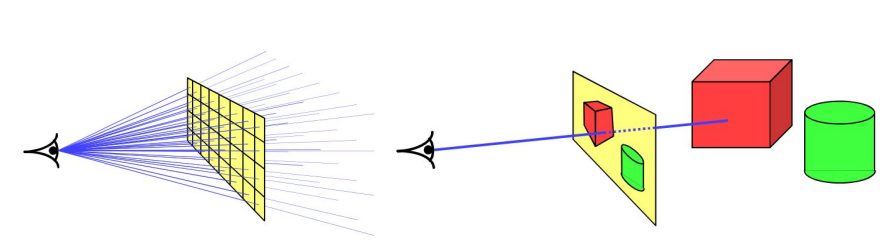

### 2.0 Algorithm

Main 5 sections of the algorithm:
1. Camera Ray casting
2. Ray-object intersection
3. Dealing with object transformation
4. Lighting calculations
5. Recursive ray tracing

Generally the algorithm of ray tracing is performed by **tracing a path from an imaginary eye** through each pixel in a virtual screen.
Take an initial point and a direction, given as a vector. The point and vecotr determine a ray.

1. Creating the rayes from our eye:
    Camera is positioned at the origin looking down at the **Z axis
   

#### 2.1 Pseudo descripitons:

> for ( each pixel of the screen )  
>>    Final color = 0;  
    Ray = ( starting point, direction )  
    Repeat
>>> for ( each object in the scene )
>>>> determine closest ray object/intersection
>>>
>>> if ( intersection exists )
>>>> for ( each light in the scene )
>>>>> if ( the light is not in shadow of another object )
>>>>>> add this light contribution to computed color
>>>>>
>>>>
>>>
>>> Final color = Final color + computed color * previous reflection factor   
>>> reflection factor = reflection factor * surface reflection property
>>> increment depth
>> until reflection factor is 0 or maximum depth is reached



------

> for (every pixel in the screen plane):
>>  Find the ray from the eye through the pixel’s center.   
>>>for (each object in the scen):
>>>>if (the ray hits the object ):
>>>>>if (the intersection is the nearest (so far) to the eye):  
Record the intersection point.  
Record the color of the object at that point.
>>>>
>>>
>Set the screen plane pixel to the nearest recorded color.color.

### Overview of cros product and dot product

### 3.0 Test implementations

#### 3.1 Scene

Define a triangle with 3 coordinates $ \lbrace t_1, t_2, t_3 \rbrace $. Each coordinate corresponds to $ \lbrace x, y, z \rbrace $ in 3D.

(<Figure size 500x500 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

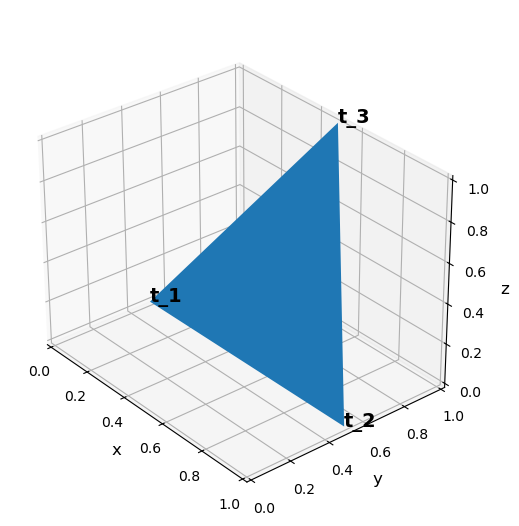

In [11]:
define_scene(30, -40, "t_1", "t_2", "t_3")

Add point of view or camera to the scene

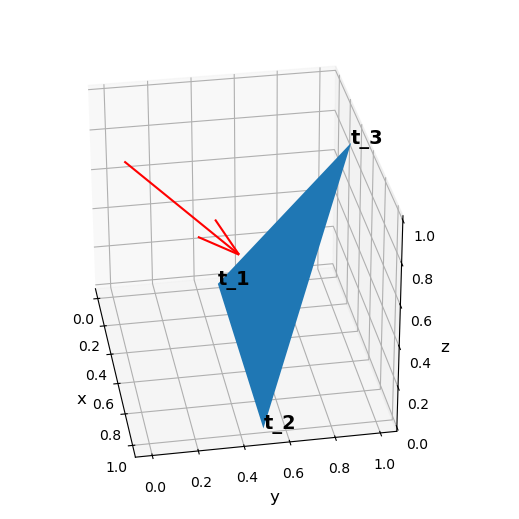

In [15]:
add_camera(30, -10)

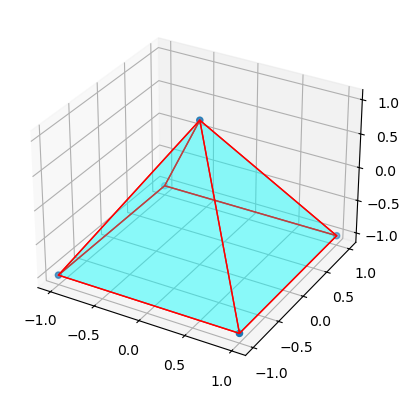

In [45]:
define_pyramid()

In [2]:
def define_scene (elev, azim, A, B, C):
    '''3.1 Scene: Defines a trianble and scene with 3 coordinates in the x, y, z axis.'''
    fig = plt.figure(figsize = (5, 5))
    
    ax = Axes3D(fig, auto_add_to_figure=False)
    
    fig.add_axes(ax)

    x = [0, 0.5, 1]
    y = [0.5, 1, 0.5]
    z = [0, 1, 0]
    
    verts = [list(zip(x, y, z))]
    
    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.8, 1, 1]))
    ax.add_collection3d(Poly3DCollection(verts))
    
    ax.text(0, 0.5, 0, A, color='black', fontsize=14, fontweight='bold')
    ax.text(1, 0.5, 0, B, color='black', fontsize=14, fontweight='bold')
    ax.text(0.5, 1, 1, C, color='black', fontsize=14, fontweight='bold')
    
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12) 
    ax.set_zlabel('z', fontsize=12)
    # set view point - elev, azim
    ax.view_init(elev, azim)
    
    return fig, ax
    plt.show()

def add_camera (elev, azim):
    '''Adds a camera or point of view to the scene'''
    soa = np.array([[0.5, 0, 1, 0, 0.5, -0.5]])
    X, Y, Z, U, V, W = zip(*soa)
    
    fig, ax = define_scene(elev, azim, "t_1", "t_2", "t_3")
    
    ax.quiver(X, Y, Z, U, V, W, color='r')

    plt.show()

def define_pyramid ():
    '''Defines a pyramid in 3d'''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    v = np.array([[-1, -1, -1], [1, -1, -1], [1, 1, -1],  [-1, 1, -1], [0, 0, 1]])
    ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])
    
    verts = [ [v[0],v[1],v[4]], [v[0],v[3],v[4]],
     [v[2],v[1],v[4]], [v[2],v[3],v[4]], [v[0],v[1],v[2],v[3]]]

    # plot sides
    ax.add_collection3d(Poly3DCollection(verts, 
     facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))
    
    plt.show()

#### 3.2 Plane Calculation

Calculate our trinagle plane:  
   - Describe a plane as $ \bar{p} = {a, b, c, k}$ where any value of $ {x, y, z} $ that satisfy $ aX + bY + cZ + k = 0 $ are on the plane.
   - $ a, b, c $ correspond to the orientation of the triangle. To calculate it we need to find the angle of the orthogonal line.
     

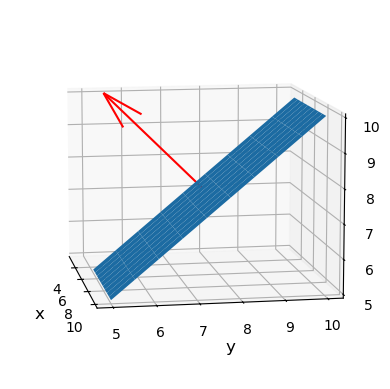

In [18]:
orthogonal_line(10, -10)

In [3]:
def orthogonal_line (elev, azim):
    ''' Define a visual orthogonal line from a plane '''
    fig = plt.figure()
    
    xs = np.linspace(5, 10, 10)
    zs = np.linspace(5, 10, 10)
    
    X1, Z1 = np.meshgrid(xs, zs)
    Y1 = Z1
    
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, Y1, Z1)
    ax.view_init(elev, azim)
    
    fig.add_axes(ax)  
    
    soa = np.array([[2.5, 8, 7, 0, -2.5, 3]])
    X, Y, Z, U, V, W = zip(*soa)
    
    ax.quiver(X, Y, Z, U, V, W, color='r')

    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12) 
    ax.set_zlabel('z', fontsize=12)
    plt.show()

Using the cross product to get the angle of the orthogonal line:
- select two vecotrs on the plane that cross;
- using the two lines crossing $ t_1 $ calculate the angels by observing the difference in coordinates:
- angle of the orthogonal line: if $ t_1 = \lbrace -1, 0, 2 \rbrace $ and $ t_2 = \lbrace 1, 0, 1 \rbrace $ and $ t_3 = \lbrace 0, -1, 3 \rbrace $

  $$ \bar{a} = t_2 - t_1 $$
  $$ \bar{b} = t_3 - t_1 $$
  
$$ \bar{a} - \bar{b} = 
  \begin{Bmatrix}
   \bar{a_x} - \bar{b_x}  \\
   \bar{a_y} - \bar{b_y}  \\
   \bar{a_z} - \bar{b_z}
  \end{Bmatrix} $$

- calcualte the cross product ($ \times $):
$$ \bar{a} \times \bar{b} = 
  \begin{Bmatrix}
   \bar{a_y} . \bar{b_z} - \bar{a_z} . \bar{b_y} \\
   \bar{a_z} . \bar{b_x} - \bar{a_x} . \bar{b_z} \\
   \bar{a_x} . \bar{b_y} - \bar{a_y} . \bar{b_x}
  \end{Bmatrix} $$

(<Figure size 500x500 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

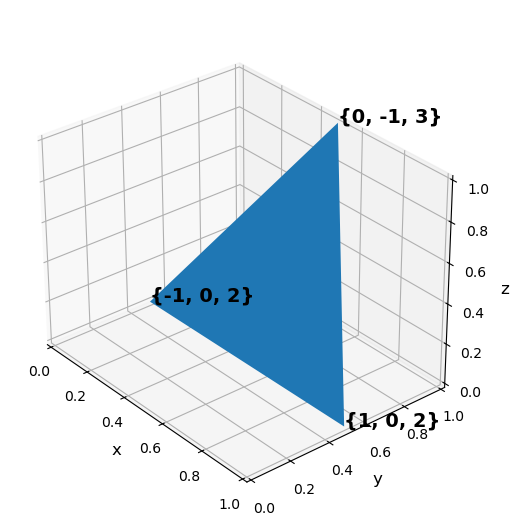

In [16]:
define_scene(30, -40, "{-1, 0, 2}", "{1, 0, 2}", "{0, -1, 3}")

- our orthogonal line is equal to: $ \bar{n} = \lbrace 0, -2, -2 \rbrace $

- calculate $ k $ using the above plane formula:
  $$ a.X + b.Y + c.Z + k = 0 $$

  $$ \bar{n_x} . \bar{s_x} + \bar{n_y} . \bar{s_y} + \bar{n_z} . \bar{s_z} + k = 0 $$
  $$ \bar{n} . \bar{s} + k = 0 $$
  $$ k = - \bar{n} . \bar{s} $$
  

- using point $ t_1 $ and the orthogonal line the formula becomes:
  $$ k = -(0 . -1 + -2 . 0 + -2 . 2) $$
  $$ k = 2 . 2 $$
  $$ k = 4 $$

- vector for the plane:
  $$ \bar{p} = 
  \begin{Bmatrix}
   \bar{n_x}  \\
   \bar{n_y}  \\
   \bar{n_z} \\
   \bar{-n} . \bar{c}
  \end{Bmatrix} =
    \begin{Bmatrix}
    0 \\
    -2 \\
    -2 \\
    4
   \end{Bmatrix} $$

- substituting with the above plane formula:
  $$ 0x - 2y - 2z + 4 = 0  $$
  $$ y + z = -2  $$
  

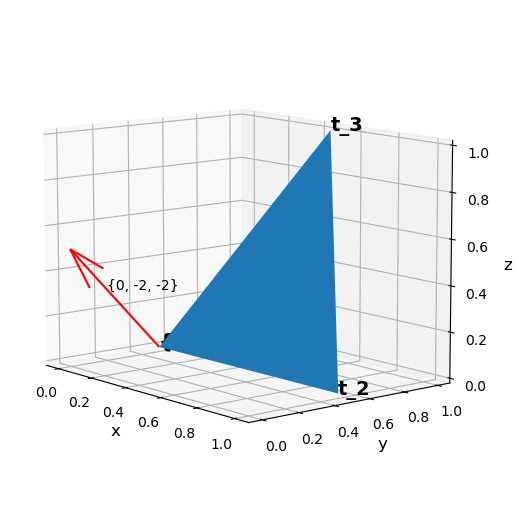

In [40]:
    soa = np.array([[0, 0.5, 0, 0, -0.5, 0.5]])
    text_coordinates = np.array([0, 0.2, 0.3])
    X, Y, Z, U, V, W = zip(*soa)
    
    fig, ax = define_scene(10, -40, "{-1, 0, 2}", "t_2", "t_3")
    
    ax.quiver(X, Y, Z, U, V, W, color='r')

    ax.text(text_coordinates[0], text_coordinates[1], text_coordinates[2], "{0, -2, -2}")

    plt.show()

#### 3.3 Calculating Ray Lines

Define 3 parameters $ \lambda $ specifing how far along the line we are, $ \bar{m} $ will be the angle of the ray and $ \bar{s} $ is the origin point of the ray.
$$ \lambda \bar{m} + \bar{s} $$

- 2D graphics formula: $ y = mx + c $
$$ {x \brace y} = \lambda . {1 \brace m}  + \bar{c} $$

- find the origin of $\bar{s} $:  all rays start at the camera (our view point) position $ \bar{c} $

- $ \bar{m} $ is the line angel. If the camera is looking through a pixel grid (imitating our screen), straight ahead in the $ z $ direction we are looking at the center most ray which goes exactly through the center.
- if our grid is 5 x 5 pixels and each pixel is 1. We can add 1 to $ m_x $ for every movement which means that for the pixel $ \lbrace p_x, p_y \rbrace (2, 2), \bar{m} is: $
  $$ \bar{m} = \begin{Bmatrix}
    0.1 \cdot (p_x - 2) \\
    01. \cdot (p_y - 2) \\
    1
    \end{Bmatrix}
  $$

- adding rotation to the camera:  
     Y Axis:
      to rotate a vecotr $ \bar{v} = (v_x, v_y, v_z) $ araound the y-axis by angle $ \theta $ we use the formula:
      $$ rot_y(\bar{v}, \theta) = 
          \begin{pmatrix}
            v_x \cdot cos \theta + v_z \cdot sin \theta \\
            v_y \\
            -v_x \cdot sin \theta + v_z \cdot cos \theta
          \end{pmatrix}
      $$
   Using trigonometric fucntions $ cos \theta $ and $ sin \theta $ to rotate the x and z components of the vector.

  

     X Axis:
       to rotate a vector $ \bar{v} = (v_x, v_y, v_z) $ around the x-axis we can use:
      $$ rot_x(\bar{v}, \theta) = 
          \begin{pmatrix}
            v_x \\
            v_y \cdot cos \theta - v_z \cdot sin \theta \\
            v_y \cdot sin \theta + v_z \cdot cos \theta
          \end{pmatrix}
      $$

      This formula rotates the y and z components while leaving the x component un  ed.

  


- combine both rotations (yaw and pitch):  
      apply both to the vector
  $ \bar{m} = \begin{Bmatrix}
    0.1 \cdot (p_x - 2) \\
    01. \cdot (p_y - 2) \\
    1
    \end{Bmatrix}
  $, with angles $ \theta_y $ and $ \theta_p $:

  $$ \bar{m}_{\substack { \theta_p }} ^ {\substack { \theta_y }} = rot_x \Biggl( rot_y \Biggl( 
          \begin{pmatrix}
            0.1 \cdot (p_x - 2) \\
            0.1 \cdot (p_y - 2) \\
            1
          \end{pmatrix},
          \theta_y \Biggl), \theta_p \Biggl) $$

  knowing $ \bar{m} $ and $ \bar{s} $ we can calculate the coordinates of any point along the ray's path.

#### 4. Intersecting Rays with Planes
- to find what each ray hits:  
    We represent a  ray by the equation $ \bar{r} = \lambda \bar{m} = \bar{s} $ where $ \bar{m} $ is the direction becor of the ray. $ \bar{s} $ is the starting point of the ray. $ \lambda $ is a scalar parameter that varies along the ray.

- intersection point and substituting:  
    We need to find the intersection point $ \bar{i} $ which lies on the ray $ \bar{r} $ and plane $ \bar{p} $. Substitute $ \bar{i} $ into the ray equation:
  
  $$ \bar{i} = \lambda \bar{m} + \bar{s} $$
  
  This gives us the coordinates of:
  
  $$ \bar{i} = 
        \begin{pmatrix}
            \lambda \cdot m_x + s_x \\
            \lambda \cdot m_y + s_y \\
            \lambda \cdot m_z + s_z
        \end{pmatrix}
  $$

- using the plane equation:
      $$ a \cdot \bar{i_x} + b \cdot \bar{i_y} + c \cdot \bar{i_z} + k = 0 $$
  
  We can substitute $ \bar{i} $ into the plane equation by using the coordinates of $ \bar{i} $ from the ray equation:
      $$ a (\lambda m_x + s_x) + b (\lambda m_y + s_y) + c (\lambda m_z + s_z) + k = 0 $$
  
  Solving for the scalar $ \lambda $ which finds the value of $ \lambda $ at which the ray intersects the plane:
      $$ a \lambda m_x + a s_x + b \lambda m_y + b s_y + c \lambda m_z + c s_z + k = 0 $$
      $$ \lambda(am_x + bm_y + cm_z) = -(as_x + bs_y + cs_z + k) $$
      $$ \lambda = - \frac{ (a, b, c)  \cdot \bar{s} + k } { (a, b, c) \cdot \bar{m}}$$

  Once we have $ \lambda $, we can substitue it back into the ray equation to find the coordinates of the intersection point $ \bar{i} $:
  $$ \bar{i} = \lambda \bar{m} + \bar{s} $$

#### 5. Validate and Filter Points

We need to check if $ \bar{i} $ is inside our triangle since at this stage we only know that it is on the same plane. In this case $ \lambda \ge 0 $. If $ \lambda $ is negative it is not a valid intersecting point.  

To check if $ \bar{i} $ is inside the bouding box of the triangle:
    If $ \bar{i} < min_x(t1, t2, t3) $ then $ \bar{i} $ is not in the triangle since it is too far left. This should be repeted for every comibnation of $ min $ or $ max $ with $ x, y, z $.

After the points that are definitelly outside are checked our triangle has 3 sides, so we know that $ \bar{i} $ is inside of the triangle if (using the Vector Cross Product Method):  

1. $ \bar{i} $ and $ t_1 $ are on the same side of $ t_2 \rightarrow t_3 $  
2. $ \bar{i} $ and $ t_2 $ are on the same side of $ t_1 \rightarrow t_3 $  
3. $ \bar{i} $ and $ t_3 $ are on the same side of $ t_1 \rightarrow t_2 $

In order to verify if $ \bar{i} $ and $ t_1 $ are on the same side of the line $ t_2 \rightarrow t_3 $:
$$ 
\begin{multline}
    \\
    \bar{v} = t2 - t3 \\
    \bar{a} = \bar{v} \times (\bar{i} - t_3) \\
    \bar{b} = \bar{v} \times (\bar{t_1} - t_3) \\
    c = \bar{a} \cdot \bar{b} \\
    c > 0 \\
    \\
\end{multline}
$$

The above uses the dot and cross products with the property that $ \bar{a} \times \bar{b} $ is the same as $ \bar{b} \times \bar{a} $ but in the oposite direction. Furthermore, $ \bar{a} $ depends on which side of $ \bar{v} $ that $ \bar{a} $ is on. 
- if $ \bar{i} $ and $ \bar{t_1} $ are on the same side of $ \bar{v} $ then the angle between them will be $ <90 \degree $. If they are on different sides the angle will be $ >90 \degree $.
- if the dot product is positive, the angle will be $ <90 \degree $ and the vectors are on the same side.
- if $ c \ge 0 $ then $ \bar{i} $ and $ \bar{t} $ are on the same side.

This process will be repeated for each side of the triangle. If an intersection point is not on the triangle this means it is not valid.

Expanding the ray tracer:
- Colour each triangle a different colour
- Send multiple rays per pixel and average the result
- Change the shape of the view plane to a dome
- Optimise your code, can it run at 60fps?
- Allow some triangles to behave like mirrors
- Add transparent materials and simulate refraction
- Add light sources to your scene, and render a shadow
- Add a black hole to the scene and simulate gravitational lensing

### 6. The Ray Tracer

The implementation uses a sphere for rendering and showing how the ray tracer works. The above explanations used the more traditional triangle shape like in more basic computer grapchics where polygons and meshes are used to build complex shapes. A sphere will better show us how a ray tracer can model reality.

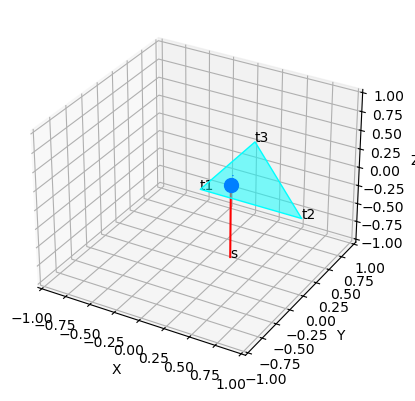

In [8]:
# test code
# Function to check if point P is on the same side of the line AB as point C
def same_side(p1, p2, a, b):
    cp1 = np.cross(b - a, p1 - a)
    cp2 = np.cross(b - a, p2 - a)
    return np.dot(cp1, cp2) >= 0

# Function to check if point P is inside the triangle ABC
def point_in_triangle(p, a, b, c):
    return same_side(p, a, b, c) and same_side(p, b, a, c) and same_side(p, c, a, b)

# Define the vertices of the triangle
t1 = np.array([0, 0, 0])
t2 = np.array([1, 0, 0])
t3 = np.array([0, 1, 0])

# Define the ray starting point and direction
s = np.array([0.2, 0.2, -1])
m = np.array([0, 0, 1])

# Plane equation coefficients
a, b, c = np.cross(t2 - t1, t3 - t1)
k = -np.dot(np.array([a, b, c]), t1)

# Calculate the intersection point of the ray with the plane
numerator = -(a * s[0] + b * s[1] + c * s[2] + k)
denominator = (a * m[0] + b * m[1] + c * m[2])
λ = numerator / denominator
intersection = s + λ * m

# Check if the intersection point is inside the triangle
inside = point_in_triangle(intersection, t1, t2, t3)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the triangle
triangle = np.array([t1, t2, t3])
ax.add_collection3d(Poly3DCollection([triangle], color='cyan', alpha=0.5))

# Plot the ray
ray = np.array([s, intersection])
ax.plot(ray[:, 0], ray[:, 1], ray[:, 2], color='red')

# Plot the intersection point
ax.scatter(*intersection, color='blue' if inside else 'red', s=100)

# Annotate points
ax.text(*t1, "t1", color='black')
ax.text(*t2, "t2", color='black')
ax.text(*t3, "t3", color='black')
ax.text(*s, "s", color='black')
ax.text(*intersection, "i", color='blue' if inside else 'red')

# Set plot limits and labels
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

$$ |V| $$

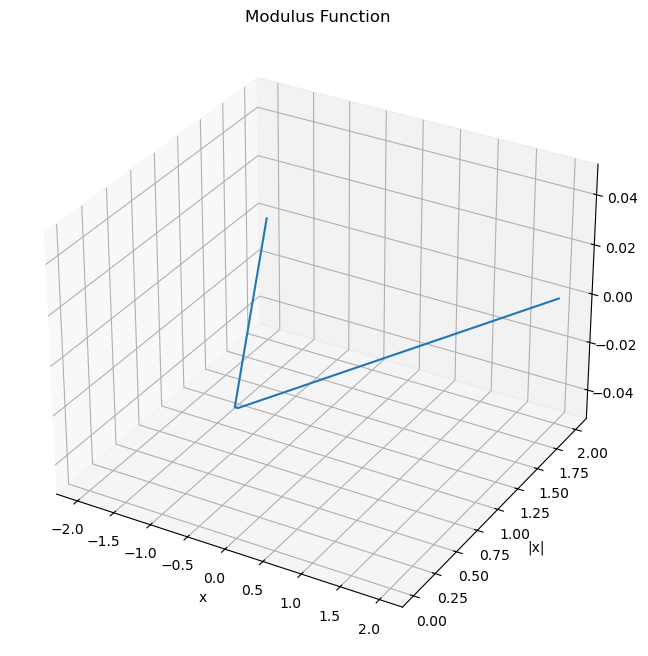

In [43]:
x = np.linspace(-2, 2, 100)
y = abs(x)

fig = plt.figure(figsize = (8, 8))
plt.axes(projection='3d')

plt.plot(x, y)
plt.title('Modulus Function')
plt.xlabel('x')
plt.ylabel('|x|')
plt.grid(True)
plt.show()

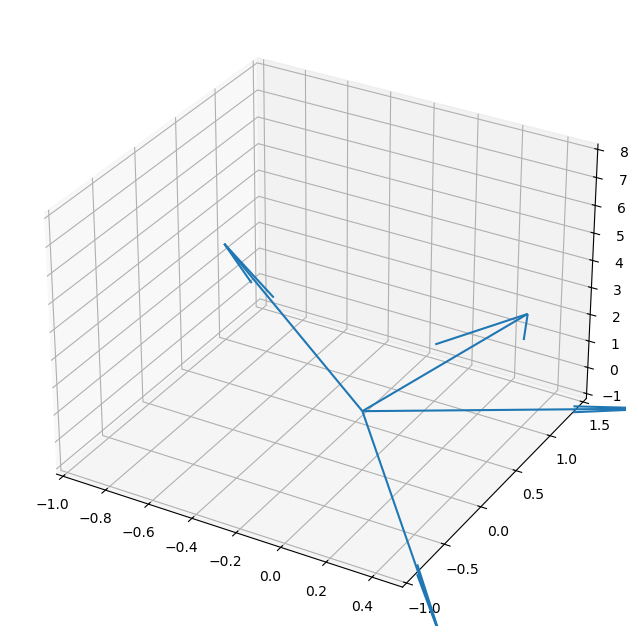

In [38]:
soa = np.array([
    [0, 0, 1, 1, -2, 0],
    [0, 0, 1, 1, 1, 0],
    [0, 0, 1, -1, 1, 1.5],
    [0, 0, 1, 0.5, 0.7, 3]])

X, Y, Z, U, V, W = zip(*soa)
# X, Y, Z base arrow location
# U, V, W arrow vectors

fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])

plt.show()

Exploring spheres:


Sources and Links:

https://inst.eecs.berkeley.edu/~cs294-13/fa09/lectures/scribe-lecture1.pdf

https://math.hws.edu/eck/cs424/downloads/graphicsbook-linked.pdf#page=151&zoom=100,96,393

https://www.cl.cam.ac.uk/teaching/1718/AdvGraph/1.%20Ray%20Tracing%20-%20All%20the%20Maths.pdf

https://blog.scottlogic.com/2020/03/10/raytracer-how-to.html